<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/cnn_cifar_10_res2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando o Dataset Cifar 10 (classes) em uma CNN

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 36kB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

Usando o dataset cifar 10 (10 classes)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
y_train[0]

array([6], dtype=uint8)

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


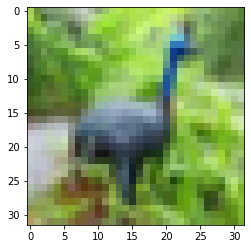

In [7]:
plt.imshow(x_train[6])

Verificando balanceamento entre as classes

In [8]:
lytr=list(y_train)
[lytr.count(i) for i in range(10)]

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [9]:
lyts=list(y_test)
[lyts.count(i) for i in range(10)]

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [0]:
#one-hot encode target column
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(80,kernel_size=3, activation='relu', input_shape=(32,32,3),use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Convolution2D(80,kernel_size=3, activation='relu',use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Convolution2D(80,kernel_size=3, activation='relu',use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.10))
model.add(tf.keras.layers.Dense(40, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 80)        2160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 80)        57600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 80)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 80)          5

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
hist=model.fit(x_train, y_train_enc, validation_data=(x_test, y_test_enc), epochs=100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 322us/sample - loss: 2.5965 - accuracy: 0.3089 - val_loss: 1.8791 - val_accuracy: 0.4473
Epoch 2/100
50000/50000 [==============================] - 8s 166us/sample - loss: 1.6328 - accuracy: 0.4901 - val_loss: 1.4800 - val_accuracy: 0.5313
Epoch 3/100
50000/50000 [==============================] - 9s 171us/sample - loss: 1.3646 - accuracy: 0.5554 - val_loss: 1.2170 - val_accuracy: 0.6039
Epoch 4/100
50000/50000 [==============================] - 8s 167us/sample - loss: 1.2469 - accuracy: 0.5921 - val_loss: 1.1890 - val_accuracy: 0.6191
Epoch 5/100
50000/50000 [==============================] - 8s 167us/sample - loss: 1.1759 - accuracy: 0.6199 - val_loss: 1.0670 - val_accuracy: 0.6591
Epoch 6/100
50000/50000 [==============================] - 8s 165us/sample - loss: 1.1155 - accuracy: 0.6396 - val_loss: 1.0235 - val_accuracy: 0.6820
Epoch 7/100
50000/50000 [==================

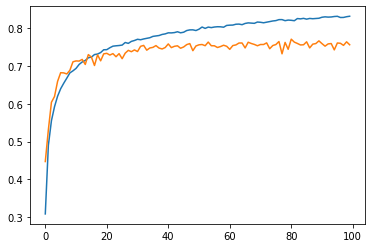

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

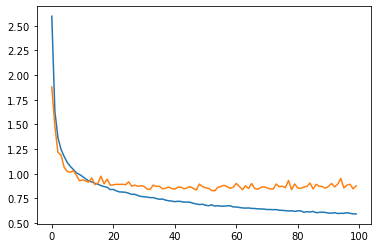

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

O modelo, depois das mudanças arquiteturais, regularizações e dropouts, aparenta não ter overfitting, mas a acurácia em torno de 70% no teste será o limite? Vamos estudar melhor.


Sim. Foi possível melhorá-lo com técnicas de regularização.
